Trial #1
Parameters:
   initStretch=0.0842067440367
   initStretchPrime=-0.19337226372
   initAngle=0.509749768202
   initAnglePrime=-0.0063976318086
C = [[  8.42067440e-02  -1.93372264e-01   5.09749768e-01  -6.39763181e-03]
 [  9.67218095e-02   4.37370774e-01   4.86674782e-01  -4.42613855e-01]
 [  1.68147560e-01   9.50451906e-01   4.25022482e-01  -7.56587277e-01]
 [  2.78770644e-01   1.19744452e+00   3.40096052e-01  -9.09849847e-01]
 [  3.97249578e-01   1.10192007e+00   2.45642213e-01  -9.58583255e-01]
 [  4.89453509e-01   6.87107896e-01   1.48631945e-01  -9.69988258e-01]
 [  5.28602592e-01   7.26590424e-02   5.05255438e-02  -9.84866724e-01]
 [  5.03420978e-01  -5.60624666e-01  -4.99961548e-02  -1.01895504e+00]
 [  4.21583824e-01  -1.02648637e+00  -1.54797363e-01  -1.06735512e+00]
 [  3.07295183e-01  -1.19101967e+00  -2.64013875e-01  -1.09874420e+00]
 [  1.93764133e-01  -1.01341482e+00  -3.72842879e-01  -1.04541922e+00]
 [  1.13081120e-01  -5.55278627e-01  -4.68400994e-01  -8.22756202

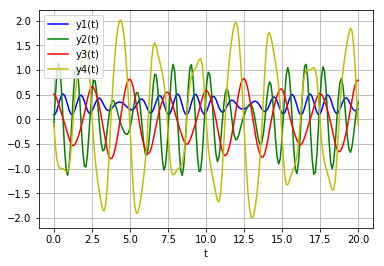

In [11]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
from mpmath import mpf

# Solve x'' + (k/m)x - (l+x)(theta)^2 - gcos(theta) = 0, (theta)^2 + (gsin(theta) - 2x'theta')/(l+x)) = 0

# Convert to system of 1st order:
# y1' = y2 
# y2' = (-k/m)*y1 + (l+y1)*(y3)^2 + g*cos(y3)
# y3' = y4
# y4' = (-g*sin(y3) - 2*y2*y4)/(l+y1)
    
def pend(I,t, m, k, l, g):
    dy1dt = I[1]
    dy2dt = (-k/m)*I[0] + (l+I[0])*(I[2])**2 + g*math.cos(I[2])
    dy3dt = I[3]
    dy4dt = ((-g*math.sin(I[2])) - (2*I[1]*I[3]))/(l+I[0])

    return [dy1dt,dy2dt,dy3dt,dy4dt]

t=np.linspace(0,20,200) #creating time array

#defining parameters
pendMass=float(str(norm.rvs(1, 0.1)))               # pendulum mass (kilograms)
springConst=float(str(norm.rvs(30, 0.25)))          # spring constant (Newtons/meter)
length=float(str(norm.rvs(1, 0.1)))                 # unstretched pendulum length (meters)
gravAccel=float(str(norm.rvs(9.8, 0.1)))            # acceleration from gravity (meters/second^2)

numTrials = 2

for trial in range(numTrials):
    print("Trial #" + str(trial+1))
    
    #defining initial conditions
    initStretch=float(str(norm.rvs(0.1, 0.01)))         # initial stretch (meters)
    initStretchPrime=float(str(norm.rvs(0, .1)))        # initial rate of change in stretch (meters/second)
    initAngle=float(str(norm.rvs(0.5, 0.01)))           # initial angle of swing (degrees)
    initAnglePrime=float(str(norm.rvs(0, .1)))          # initial rate of change in angle (degrees/second)
    initial_conditions = [initStretch, initStretchPrime, initAngle, initAnglePrime]
    
    
    print("Parameters:")
    print("   initStretch=" + str(initStretch))
    print("   initStretchPrime=" + str(initStretchPrime))
    print("   initAngle=" + str(initAngle))
    print("   initAnglePrime=" + str(initAnglePrime))

    C=integrate.odeint(pend, initial_conditions, t, args=(pendMass, springConst, length, gravAccel))     # calling odeint
    print("C = " + str(C))

plt.plot(t, C[:, 0], 'b', label='y1(t)')
plt.plot(t, C[:, 1], 'g', label='y2(t)')
plt.plot(t, C[:, 2], 'r', label='y3(t)')
plt.plot(t, C[:, 3], 'y', label='y4(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()